In [5]:
#Need this location for rest of the project to be located from
import sys
sys.path.append('C:\\Users\\PAT\\Documents\\edwisor\\projects\\iris')
from iris.__init__ import * #TBD(look into why we need thos)
from iris.config import *

## SVM

In [3]:
#load the dataset
dataset = load_iris()

In [9]:
#Make dataframe from dataset bunch(containing iv, dv as arrays data and feature_names resp)
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df['target'] = dataset.target
df['flower_name '] = df['target'].apply(lambda x:dataset.target_names[x])

In [10]:
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa


In [14]:
#Lets make dataframe for different flower types
df0 = df[df['target'] == 0]
df1 = df[df['target'] == 1]
df2 = df[df['target'] == 2]

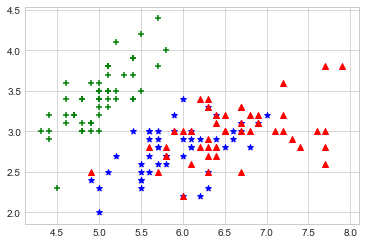

In [28]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],marker='+',color='green')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],marker='*',color='blue')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],marker='^',color='red')

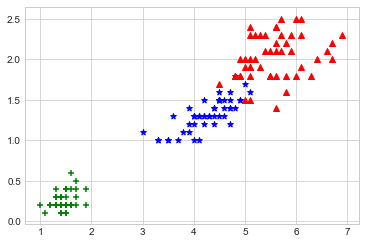

In [29]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],marker='+',color='green')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],marker='*',color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],marker='^',color='red')

In [30]:
print(df.columns)
iv = df.drop(['flower_name ','target'],axis=1)
dv=df['target'].values
iv_train,iv_test,dv_train,dv_test = train_test_split(iv,dv,test_size = 0.2)
model = SVC().fit(iv_train, dv_train)
model

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'flower_name '],
      dtype='object')


C:\Users\PAT\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [31]:
model.score(iv_test,dv_test)

0.9333333333333333

In [37]:
#very high gamma make more error in model prediction
model = SVC(C=100,gamma=100).fit(iv_train, dv_train)
model.score(iv_test,dv_test)

0.5333333333333333

In [40]:
#This gamma make good model prediction
model = SVC(C=1,gamma=10).fit(iv_train, dv_train)
model.score(iv_test,dv_test)

0.9666666666666667

## Logistics Regression
Uses probabilty for each of the IV, based on if p>0.5 then we say 1 or else 0

In [1]:
from sklearn.datasets import load_breast_cancer

In [125]:
breast_cancer = load_breast_cancer()#load
data = pd.DataFrame(data=breast_cancer.data,columns=breast_cancer.feature_names)
data['cancer'] = breast_cancer.target
data['size'] = data['cancer'].apply(lambda x: breast_cancer.target_names[x])
data[data.cancer == 1].head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer,size
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1,benign
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1,benign
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1,benign
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1,benign
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1,benign


In [126]:
#lets rename our target variable
#data.cancer = data.cancer.map({0:'malignant',1:'beningn'})
#0 means negative class, whcih implies cancer is worrysome
#1 means positive class, which means no cancer to be worried about

In [127]:
iv = data.drop(['size','cancer'],axis=1)
dv = data['cancer'].values
iv_train,iv_test,dv_train,dv_test = train_test_split(iv,dv,test_size =0.2)

np.any(breast_cancer.target==0)


True

In [128]:
model = LogisticRegression(C=0.1)
model.fit(iv_train,dv_train)
dv_test_pred = model.predict(iv_test)
model.score(iv_test,dv_test)

C:\Users\PAT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



0.9649122807017544

In [129]:
dv_test.shape,dv_test_pred.shape


((114,), (114,))

In [130]:
#confusion matrix
#here negative cases(one with malignant cancer) are imp to be diagonsed
cm = pd.crosstab(dv_test,dv_test_pred)
#cm = cm.rename(columns={'beningn':1,'malignant':0},index={'beningn':1,'malignant':0})

acc = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])#the no of tp+tn/all
specifity = (cm[1][1]/(cm[1][1]+cm[1][0]))*100#no of negatives correctly classified (no of cancer patients)****************
fnr  = (cm[0][1]/(cm[0][1]+cm[0][0]))*100#no of -ve wrongly classified, predicted as +...wrong info about cancer patient\
                                        #(they dint have cancer) 

recall = (cm[0][0]/(cm[0][1]+cm[0][0]))*100#no of actual +ve classes correctly classified(no of non-cancer patients)
fpr = (cm[1][0]/ (cm[1][0]+cm[1][1]))*100#no of wrong positives , predicted as + but actually negative...Wrongly telling \
                                    #a cancer patient that he was healthy*********
#0-nd,1-d
print(cm)
print('accuracies: ')
print('**Accuracy in telling if a person\'s cancer is malignant(need diagnosis) :',specifity )
print('**Wrongly telling a person that he was healthy(but actually he needed diagnosis)',fpr )
print('Accuracy in telling if a person\'s cancer is benign(no issues)',recall )
print('Wrongly telling a person that he was having cancer(but actually he okay and dint need panic)',fnr )



col_0   0   1
row_0        
0      42   3
1       1  68
accuracies: 
**Accuracy in telling if a person's cancer is malignant(need diagnosis) : 95.77464788732394
**Wrongly telling a person that he was healthy(but actually he needed diagnosis) 4.225352112676056
Accuracy in telling if a person's cancer is benign(no issues) 97.67441860465115
Wrongly telling a person that he was having cancer(but actually he okay and dint need panic) 2.3255813953488373


## overall model is good since we focus more on specificity and fpr in this scenario

0.9938808373590983


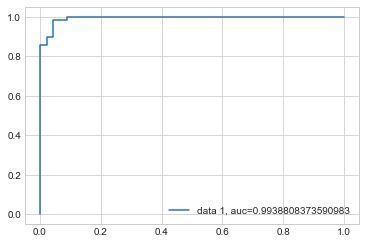

In [133]:
dv_test_pred_proba = model.predict_proba(iv_test)[::,1]
fpr, tpr, _ = roc_curve(dv_test,  dv_test_pred_proba)
auc = roc_auc_score(dv_test,  dv_test_pred_proba)
print(auc)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()



## Findings of roc_curve
Recall is also called sensitivity(TP rate)
Specificity is also called TN rate
F1 score = combination of recall and specificity
Depending on the kind of problem you want to solve you may want to maximize either sensitivity or specificity.
confusion matrix considers only a single threshild value to generate a curve vs all possibe classification thresholds are considered for ROC curve

ROC compares TPR(y-axis) vs FPR(x-axis) 
More the area under the curve, better the model 
E.g. Paper published in a Journal
positives(admitted) = 250
negatives(not admitted) =250

Based on prob threshold(>0.6 genrally) which we set, we classify into classes
If you model did not do well, then distribution plot for both classes will be overalapping for a significant area and 
the roc curve will be a 45 degree line, telling that model just did guessing

TPR = TP / all positives
FPR = FP/ all negatives

Curve generation
E.g. If threshold is say 0.8,then the area to the right of the curve is admitted and to the left is not admitted
TPR = 50(red pixels to the right of threshold line)/250(total red(pos) pixels)
FPR = 0(blue pixels to the right of threshold line)/250(total red(pos) pixels)
plot (FPR,TPR) --> (0,0.2)
E.g. If threshold is say 0.5, then the area to the right of the curve is admitted and to the left is not admitted
TPR = 230(red pixels to the right of threshold line)/250(total red(pos) pixels)=0.94
FPR = 125(blue pixels to the right of threshold line)/250(total red(pos) pixels)=0.5
plot (FPR,TPR) --> (0.5,0.94)
All the possible classificaton thresholds are considered and points are plotted to fit a curve

So for good model, curve will be hugging the topmost left corner, more area under the curve


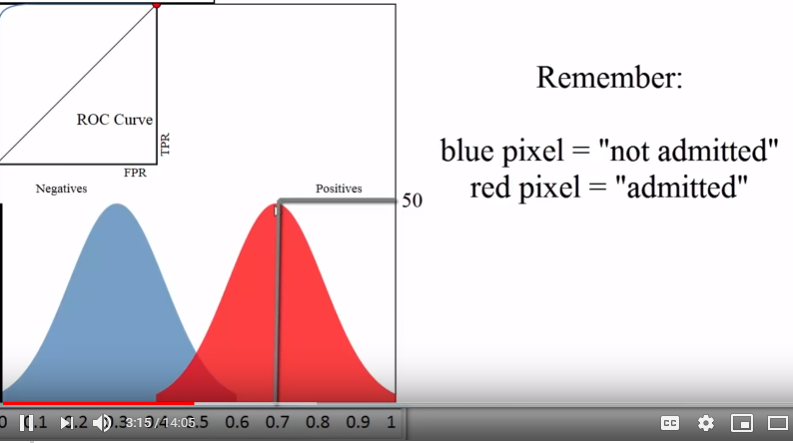
